In [1]:
import pandas as pd
import matplotlib as plt
from vega_datasets import data

In [59]:
df = data.sf_temps()
df.head(2)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


##### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [61]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

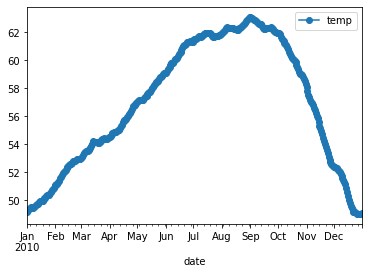

In [62]:
df.resample('D').mean().plot(marker='o')

<AxesSubplot:xlabel='date'>

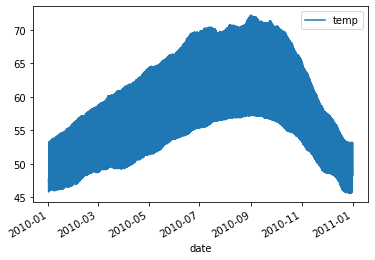

In [63]:
df.plot()

##### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

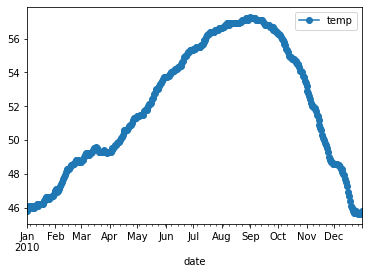

In [64]:
df.resample('D').min().plot(marker='o')

##### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

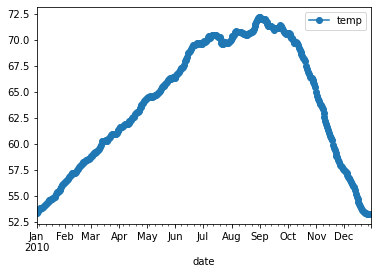

In [65]:
df.resample('D').max().plot(marker='o')

##### 4. Which month is the coldest, on average?

In [66]:
df.resample('M').min().sort_values(by = 'temp').head(1)

,temp
date,
2010-12-31,45.6


##### 5. Which month has the highest average temperature?

In [67]:
df.resample('M').max().sort_values(by='temp').tail(2)

,temp
date,
2010-08-31,72.2
2010-09-30,72.2


##### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [68]:
temp_dif=df.resample('D').agg(['min','max'])

In [69]:
# need to rename columns temp,min and temp, max
temp_dif.columns = ["_".join(x) for x in temp_dif.columns.ravel()]

<ipython-input-69-7a1f820f4cc9>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  temp_dif.columns = ["_".join(x) for x in temp_dif.columns.ravel()]


In [70]:
temp_dif.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_min  365 non-null    float64
 1   temp_max  365 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [71]:
temp_dif['difference'] = temp_dif['temp_max'] - temp_dif['temp_min']

In [72]:
temp_dif

,temp_min,temp_max,difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [73]:
temp_dif.resample('D').difference.max().sort_values(ascending=False).head(1)

date
2010-08-31    15.0
Name: difference, dtype: float64

##### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

# Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
# i.e. the min, average, and maximum temperature should be 3 seperate lines.

df.resample('D').min().temp.plot(label = 'Min temp')
df.resample('D').max().temp.plot(label = 'Max temp')
df.resample('D').mean().temp.plot(label = 'Avg temp')


# Second set of exercise questions

In [2]:
wdf = data.seattle_weather()
wdf.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [4]:
wdf = wdf.set_index('date').sort_index()

In [5]:
wdf.shape

(1461, 5)

##### 1. Which year and month combination has the highest amount of precipitation?

In [6]:
wdf.resample('M').sum().sort_values(by='precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


##### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

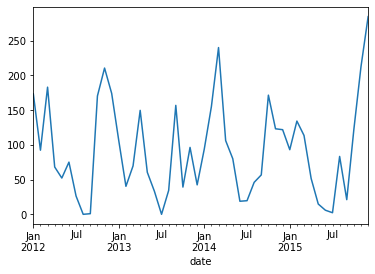

In [7]:
wdf.resample('M').sum().precipitation.plot()

##### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

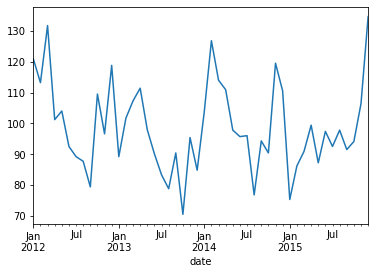

In [8]:
wdf.resample('M').sum().wind.plot()

##### 4. Which year-month combination is the windiest?

In [9]:
wdf.resample('M').sum().sort_values(by='wind', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


##### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [10]:
wdf.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [11]:
# create mask of dataframe with only days that had sun
# resampled by year and used aggregate function count
# 2014 was the sunniest year. had 211 days of sun
# which is a lot higher than I would have expected from Seattle

wdf[wdf.weather == 'sun'].resample('Y').agg('count')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


##### 6. In which month does it rain the most?

In [16]:
#2012
wdf[wdf.weather == 'rain'].resample('Y').agg('count')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,191,191,191,191,191
2013-12-31,60,60,60,60,60
2014-12-31,3,3,3,3,3
2015-12-31,5,5,5,5,5


##### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [19]:
#2012
wdf[wdf.precipitation > 0].resample('M').agg('count').sort_values(by = 'precipitation', ascending = False).head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,27,27,27,27,27
2015-12-31,25,25,25,25,25
2012-01-31,22,22,22,22,22
2012-03-31,22,22,22,22,22
2015-11-30,20,20,20,20,20


# Third set of exercise questions

In [20]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [21]:
flights.set_index('date').sort_index()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


##### 1. Convert any negative delays to 0.

In [22]:
# clip should take care of all the values lower than 0 and turn them to 0
flights['delay'].clip(lower=0).head()

0    32
1     0
2     3
3     0
4     0
Name: delay, dtype: int64

In [23]:
# assign clipped series to delay column
flights['delay'] = flights['delay'].clip(lower=0)

In [26]:
flights.head(2)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP


##### 2. Which hour of the day has the highest average delay? - Yes - Wednesday

In [28]:
flights['weekday'] = flights.date.dt.day_name()

In [29]:
flights.head()

,date,delay,distance,origin,destination,weekday
0,2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
1,2001-01-31 16:40:00,0,1093,FLL,ISP,Wednesday
2,2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
3,2001-01-10 21:00:00,0,550,MSY,MCO,Wednesday
4,2001-03-30 21:45:00,0,229,STL,IND,Friday


In [55]:
flights.groupby(by = 'date').mean()

,delay,distance
date,,
2001-01-01 00:01:00,14.0,405.0
2001-01-01 06:20:00,0.0,491.0
2001-01-01 06:30:00,0.0,251.0
2001-01-01 07:00:00,0.0,332.0
2001-01-01 07:05:00,6.5,521.0
...,...,...
2001-03-31 20:52:00,45.0,487.0
2001-03-31 20:57:00,51.0,787.0
2001-03-31 21:02:00,26.0,303.0


##### 3. Does the day of the week make a difference in the delay amount?

In [52]:
flights.groupby(by = 'weekday').mean()

,delay,distance
weekday,,
Friday,17.757596,501.118230
Monday,7.165772,505.032215
Saturday,8.431498,550.889031
Sunday,10.413542,507.987758
Thursday,12.821322,485.175025
Tuesday,9.410866,496.021732
Wednesday,11.032478,501.009094


##### 4. Does the month make a difference in the delay amount?

In [56]:
flights['month'] = flights.date.dt.month_name()

In [57]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
 5   weekday      20000 non-null  object        
 6   month        20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.1+ MB


In [58]:
flights.groupby(by = 'month').mean()

,delay,distance
month,,
February,12.306106,511.156170
January,11.301592,500.391952
March,9.875287,504.712069


# BONUS exercise questions

In [ ]:
data.iowa_electricity().head()

##### 1. For each row, calculate the percentage of the year's total that energy source provided.

##### 2. Lineplot of generation over time, color by source

##### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

##### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

##### 5. Is the total generation increasing over time?

##### 5. a. How would you control for increasing consumption over time when considering how much energy is coming from each source?

##### 5. b. express each number as a % of the year's total

# Second BONUS exercise questions

##### 1. Use the sf_temps dataset

##### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

##### 3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

##### 4. reate pretty labels for time plots

##### 5. isualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar